In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os


In [3]:
# Define the directory where the CSV files are located
directory = r"C:/Users/shovo/OneDrive - University of Waterloo/Documents/NRE Lab/LIDAR Research/Codes/stat_analysis/Python codes/PCA_Stairs_Detection_ML/pointCloudProcessing"

# Read the CSV files
false_negatives_path = os.path.join(directory, 'false_negatives.csv')
false_positives_path = os.path.join(directory, 'false_positives.csv')

false_negatives_df = pd.read_csv(false_negatives_path)
false_positives_df = pd.read_csv(false_positives_path)

In [4]:
# Extract the 'File Name' column
false_negatives = false_negatives_df['File Name'].tolist()
false_positives = false_positives_df['File Name'].tolist()


In [5]:
# Function to extract the base file name
def extract_base_name(file_list):
    base_names = []
    for filename in file_list:
        base_name = "_".join(filename.split("_")[:-1])
        base_names.append(base_name)
    return base_names


In [6]:
# Extract base names
false_neg_base_names = extract_base_name(false_negatives)
false_pos_base_names = extract_base_name(false_positives)

# Count frequencies
neg_counts = Counter(false_neg_base_names)
pos_counts = Counter(false_pos_base_names)


In [7]:
# Convert to DataFrame for easy plotting
neg_df = pd.DataFrame.from_dict(neg_counts, orient='index', columns=['Count'])
pos_df = pd.DataFrame.from_dict(pos_counts, orient='index', columns=['Count'])


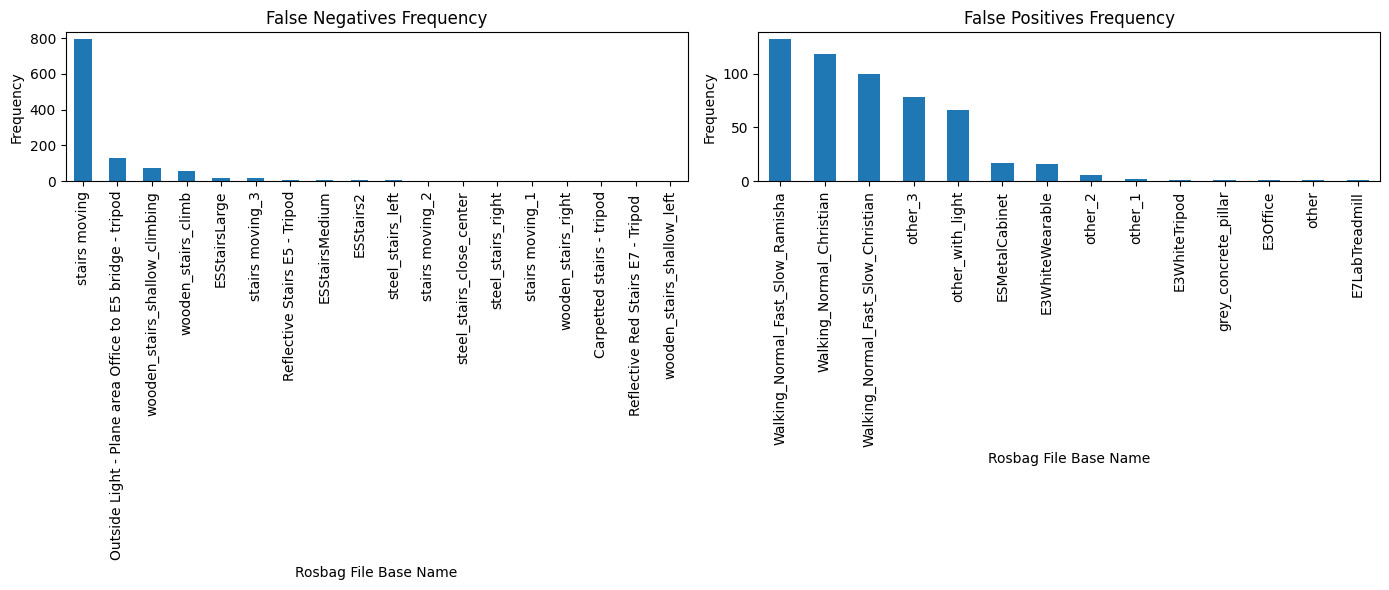

In [9]:
# Plotting with modified axis titles
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
neg_df.sort_values(by='Count', ascending=False).plot(kind='bar', legend=False, ax=plt.gca())
plt.title('False Negatives Frequency')
plt.ylabel('Frequency')
plt.xlabel('Rosbag File Base Name')

plt.subplot(1, 2, 2)
pos_df.sort_values(by='Count', ascending=False).plot(kind='bar', legend=False, ax=plt.gca())
plt.title('False Positives Frequency')
plt.ylabel('Frequency')
plt.xlabel('Rosbag File Base Name')

plt.tight_layout()
plt.show()


Top 6 False Negatives Categories:
['stairs moving', 'Outside Light - Plane area Office to E5 bridge - tripod', 'wooden_stairs_shallow_climbing', 'wooden_stairs_climb', 'ESStairsLarge', 'stairs moving_3']
Top 6 False Positives Categories:
['Walking_Normal_Fast_Slow_Ramisha', 'Walking_Normal_Christian', 'Walking_Normal_Fast_Slow_Christian', 'other_3', 'other_with_light', 'ESMetalCabinet']


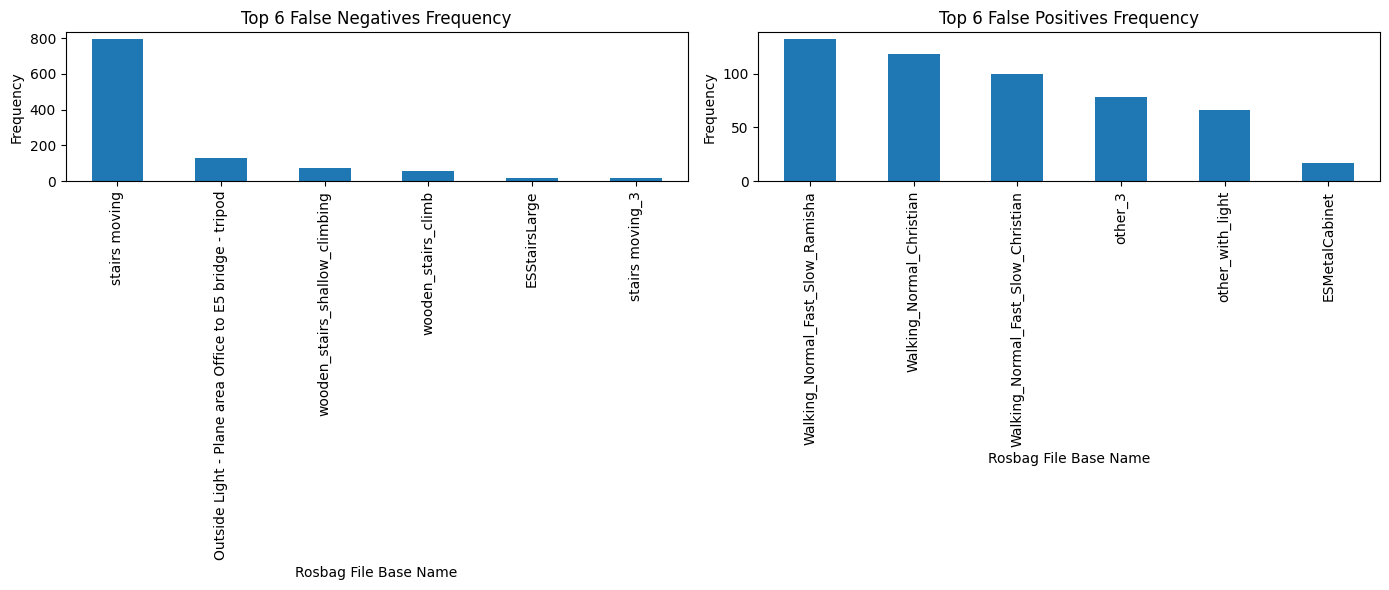

In [11]:
# Function to plot top N categories, print them, and save to a dictionary
def plot_top_n_categories(neg_df, pos_df, top_n=5):
    plt.figure(figsize=(14, 6))
    
    # Plot Top N False Negatives
    plt.subplot(1, 2, 1)
    neg_df_top = neg_df.sort_values(by='Count', ascending=False).head(top_n)
    neg_df_top.plot(kind='bar', legend=False, ax=plt.gca())
    plt.title(f'Top {top_n} False Negatives Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Rosbag File Base Name')
    
    # Print and save the top N false negatives
    top_neg_categories = neg_df_top.index.tolist()
    print(f"Top {top_n} False Negatives Categories:")
    print(top_neg_categories)

    # Plot Top N False Positives
    plt.subplot(1, 2, 2)
    pos_df_top = pos_df.sort_values(by='Count', ascending=False).head(top_n)
    pos_df_top.plot(kind='bar', legend=False, ax=plt.gca())
    plt.title(f'Top {top_n} False Positives Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Rosbag File Base Name')
    
    # Print and save the top N false positives
    top_pos_categories = pos_df_top.index.tolist()
    print(f"Top {top_n} False Positives Categories:")
    print(top_pos_categories)
    
    plt.tight_layout()
    plt.show()
    
    # Create a structure (dictionary) to map custom names later
    top_categories = {
        "false_negatives": top_neg_categories,
        "false_positives": top_pos_categories
    }
    
    return top_categories

# Example Usage: Plot the top 6 categories and retrieve the structure
top_categories = plot_top_n_categories(neg_df, pos_df, top_n=6)


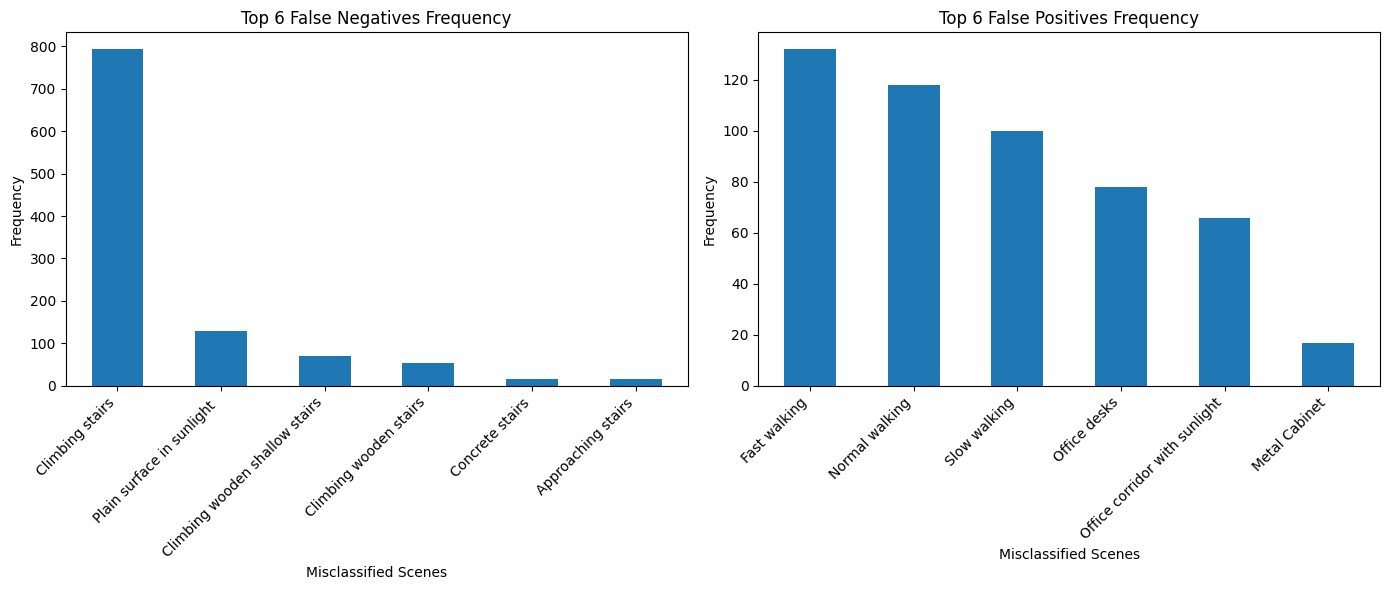

In [16]:
# Function to modify x-axis labels and plot top N categories using the top_categories structure
def plot_top_n_categories_with_custom_labels(top_categories, custom_labels_neg=None, custom_labels_pos=None):
    plt.figure(figsize=(14, 6))
    
    # Plot Top N False Negatives with custom labels
    plt.subplot(1, 2, 1)
    neg_df_top = neg_df.loc[top_categories["false_negatives"]]
    ax1 = neg_df_top.plot(kind='bar', legend=False, ax=plt.gca())
    plt.title(f'Top {len(top_categories["false_negatives"])} False Negatives Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Misclassified Scenes')
    
    # Modify x-axis labels for False Negatives if custom labels are provided
    if custom_labels_neg:
        ax1.set_xticklabels(custom_labels_neg, rotation=45, ha='right')

    # Plot Top N False Positives with custom labels
    plt.subplot(1, 2, 2)
    pos_df_top = pos_df.loc[top_categories["false_positives"]]
    ax2 = pos_df_top.plot(kind='bar', legend=False, ax=plt.gca())
    plt.title(f'Top {len(top_categories["false_positives"])} False Positives Frequency')
    plt.ylabel('Frequency')
    plt.xlabel('Misclassified Scenes')
    
    # Modify x-axis labels for False Positives if custom labels are provided
    if custom_labels_pos:
        ax2.set_xticklabels(custom_labels_pos, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Labels taken from the previous cell output:

# Top 6 False Negatives Categories:
# ['stairs moving', 'Outside Light - Plane area Office to E5 bridge - tripod', 'wooden_stairs_shallow_climbing', 'wooden_stairs_climb', 'ESStairsLarge', 'stairs moving_3']
# Top 6 False Positives Categories:
# ['Walking_Normal_Fast_Slow_Ramisha', 'Walking_Normal_Christian', 'Walking_Normal_Fast_Slow_Christian', 'other_3', 'other_with_light', 'ESMetalCabinet']


# Plot the top 6 categories with custom labels using the top_categories structure
custom_labels_neg = ['Climbing stairs', 'Plain surface in sunlight ', 'Climbing wooden shallow stairs', 'Climbing wooden stairs', 'Concrete stairs', 'Approaching stairs']
custom_labels_pos = ['Fast walking', 'Normal walking', 'Slow walking', 'Office desks', 'Office corridor with sunlight', 'Metal Cabinet']

plot_top_n_categories_with_custom_labels(top_categories, custom_labels_neg=custom_labels_neg, custom_labels_pos=custom_labels_pos)
